In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#change the setting to display all columns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\Class code\access-to-health-care_subnational_ken.csv")

In [3]:
data.head()

,ISO3,Location,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,IndicatorOrder,IndicatorType,CharacteristicId,CharacteristicOrder,CharacteristicCategory,CharacteristicLabel,ByVariableId,ByVariableLabel,IsTotal,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,#country+code,#loc+name,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,NaN,#country+name,#date+year,#survey+id,#indicator+code,NaN,NaN,NaN,NaN,NaN,NaN,#indicator+label+code,#indicator+label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,Coast,749384,Antenatal care provider: Doctor,35.9,1,KE,Kenya,1989,KE1989DHS,RH_ANCP_W_DOC,83363010.0,I,416003.0,1416010.0,Region,Coast,14000,Three years preceding the survey,0.0,0.0,RHANCPWDOC,KEDHS1989416003,1989,DHS,211.0,320.0,NaN,NaN,1.0
2,KEN,Coast,3840707,Antenatal care provider: Doctor,33.8,1,KE,Kenya,1989,KE1989DHS,RH_ANCP_W_DOC,83363010.0,I,416003.0,1416010.0,Region,Coast,14001,Five years preceding the survey,0.0,0.0,RHANCPWDOC,KEDHS1989416003,1989,DHS,268.0,403.0,NaN,NaN,1.0
3,KEN,Coast,749372,Antenatal care provider: Doctor,34.3,1,KE,Kenya,1989,KE1989DHS,RH_ANCP_W_DOC,83363010.0,I,416003.0,1416010.0,Region,Coast,14002,Two years preceding the survey,0.0,1.0,RHANCPWDOC,KEDHS1989416003,1989,DHS,142.0,224.0,NaN,NaN,1.0
4,KEN,Eastern,4613978,Antenatal care provider: Doctor,30.6,1,KE,Kenya,1989,KE1989DHS,RH_ANCP_W_DOC,83363010.0,I,416004.0,1416030.0,Region,Eastern,14000,Three years preceding the survey,0.0,0.0,RHANCPWDOC,KEDHS1989416004,1989,DHS,663.0,461.0,NaN,NaN,1.0


Data Cleaning

In [37]:
# Drop First row
df_health = data.iloc[1:]

# Drop columns with all missing values
df_health = df.dropna(axis=1, how='all')

# Drop Id columns
to_drop = [column for column in df.columns if 'ID' in column or 'Id' in column] 
df_health = df.drop(to_drop, axis=1)
'''
 # Drop ID columns
id_columns = [column for column in df_health.columns if 'id' in column.lower()[-2:]]
df_health = df_health.drop(id_columns, axis=1)
'''

# Drop order columns
to_drop = [column for column in df_health.columns if 'order' in column.lower()[-5:]]
df_health = df_health.drop(to_drop, axis=1)

# Drop columns with single values
unique_columns = df_health.loc[:, df_health.nunique() == 1].columns
df_health = df_health.drop(unique_columns, axis=1)

# Drop duplicate values
df_health = df_health.drop(['CharacteristicLabel'], axis=1)

# Column type conversion
df_health['Value'] = df_health['Value'].astype(float)

In [38]:
#view new dataset
df_health.head()

,Location,Indicator,Value,Precision,SurveyYear,IndicatorType,ByVariableLabel,IsPreferred,SurveyYearLabel,DenominatorWeighted,DenominatorUnweighted,LevelRank
1,Coast,Antenatal care provider: Doctor,35.9,1,1989,I,Three years preceding the survey,0.0,1989,211.0,320.0,1.0
2,Coast,Antenatal care provider: Doctor,33.8,1,1989,I,Five years preceding the survey,0.0,1989,268.0,403.0,1.0
3,Coast,Antenatal care provider: Doctor,34.3,1,1989,I,Two years preceding the survey,1.0,1989,142.0,224.0,1.0
4,Eastern,Antenatal care provider: Doctor,30.6,1,1989,I,Three years preceding the survey,0.0,1989,663.0,461.0,1.0
5,Eastern,Antenatal care provider: Doctor,32.6,1,1989,I,Five years preceding the survey,0.0,1989,778.0,538.0,1.0


Summary Statistics

In [39]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               10000 non-null  object 
 1   Indicator              10000 non-null  object 
 2   Value                  10000 non-null  float64
 3   Precision              10000 non-null  object 
 4   SurveyYear             10000 non-null  object 
 5   IndicatorType          10000 non-null  object 
 6   ByVariableLabel        9778 non-null   object 
 7   IsPreferred            10000 non-null  float64
 8   SurveyYearLabel        10000 non-null  object 
 9   DenominatorWeighted    8870 non-null   float64
 10  DenominatorUnweighted  8858 non-null   float64
 11  LevelRank              10000 non-null  float64
dtypes: float64(5), object(7)
memory usage: 937.6+ KB


In [41]:
df_health.describe()

,Value,IsPreferred,DenominatorWeighted,DenominatorUnweighted,LevelRank
count,10000.000000,10000.000000,8870.000000,8858.000000,10000.000000
mean,124.489380,0.378700,421.997632,439.613795,1.474600
std,313.419157,0.485087,521.481804,557.111627,0.499379
min,0.000000,0.000000,3.000000,25.000000,1.000000
25%,4.100000,0.000000,139.000000,188.000000,1.000000
50%,36.700000,0.000000,264.000000,301.000000,1.000000
75%,100.000000,1.000000,502.000000,487.000000,2.000000
max,6850.000000,1.000000,5677.000000,6850.000000,2.000000


1. Reginal difference in Antenatal Care:
How do ANc  provider types(Doctor, nurse/midwives, traditional birth attendant) vary across regions?

In [40]:
#A pivot table is a table of statistics that summarizes the data of a more extensive table
# (such as from a database, spreadsheet, or business intelligence program).
# This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.
#We shall make a pivot table to show how antenatal care coverage varies across different regions in Kenya it will have columns for the different indicators and rows for the different regions

# Pivot table
#Convert the value column to float data type
df_health['Value']= df_health['Value'].astype(float)

# Define the target locations
target_locations = ["Nairobi", "Nyanza", "Rift Valley", "Coast", "Western", 
                    "Semi-arid, saesonal", "North Eastern", "Eastern", "Coast", "Central"]

pivot_table = df_health.pivot_table(index='Location', columns='Indicator', values='Value', aggfunc='sum')
pivot_table

Indicator,Antenatal care from a skilled provider,Antenatal care provider: Community health worker,Antenatal care provider: Doctor,Antenatal care provider: Missing,Antenatal care provider: Nurse/midwife,Antenatal care provider: Other,Antenatal care provider: Other health worker,Antenatal care provider: Traditional birth attendant,Antenatal care: Total,Assistance during delivery from a skilled provider,Assistance during delivery: Doctor,Assistance during delivery: No one,Assistance during delivery: Nurse/midwife,Assistance during delivery: Other health worker,Assistance during delivery: Relative or other,Assistance during delivery: Total,Assistance during delivery: Traditional birth attendant,Assistance during delivery: don't know or missing,Child took antibiotic drugs for fever,Child took antimalarial drugs for fever,Children with ARI for whom advice or treatment was sought,Children with fever for whom advice or treatment was sought,Children with symptoms of ARI,Children with symptoms of ARI who received antibiotics,Delivery by cesarean section,No antenatal care,No postnatal checkup for mother within first two days of birth,No postnatal checkup for newborn within first two days of birth,Number of children born in the last five (or three) years,Number of children born in the last five (or three) years (unweighted),Number of children with fever in the last two weeks,Number of children with fever in the last two weeks (unweighted),Number of children with symptoms of ARI born in the last five (or three) years,Number of children with symptoms of ARI born in the last five (or three) years (unweighted),Number of live births (or stillbirths) in the last two (or three/five) years,Number of live births (or stillbirths) in the last two (or three/five) years (unweighted),Number of mothers,Number of mothers (unweighted),Number of newborns,Number of newborns (unweighted),Number of women with a live birth (or stillbirth) in the last two (or three/five) years,Number of women with a live birth (or stillbirth) in the last two (or three/five) years (unweighted),Place of delivery: At home,Place of delivery: Health facility,Place of delivery: Other,Place of delivery: Private sector,Place of delivery: Public sector,Place of delivery: Total,Place of delivery: don't know or missing,Provider of mothers' first postnatal checkup: Community health worker,Provider of mothers' first postnatal checkup: Doctor/nurse/midwife,Provider of mothers' first postnatal checkup: Total,Provider of mothers' first postnatal checkup: Traditional birth attendant,Provider of mothers' first postnatal checkup: don't know or missing,Provider of newborns' first postnatal checkup: Community health worker,Provider of newborns' first postnatal checkup: Doctor/nurse/midwife,Provider of newborns' first postnatal checkup: Total,Provider of newborns' first postnatal checkup: Traditional birth attendant,Treatment of diarrhea: Advice or treatment was sought,Treatment of diarrhea: Antibiotics,Treatment of diarrhea: Antimotility drugs,Treatment of diarrhea: Either ORS or RHF,Treatment of diarrhea: Home remedy - other,Treatment of diarrhea: Increased fluids,Treatment of diarrhea: Injection,Treatment of diarrhea: Intravenous solution,"Treatment of diarrhea: No ORS, RHF or increased fluids",Treatment of diarrhea: No treatment,Treatment of diarrhea: ORT or increased fluids,Treatment of diarrhea: Oral rehydration solution (ORS),Treatment of diarrhea: Recommended home fluids (RHF) at home,Treatment of diarrhea: Zinc supplements,Treatment of diarrhea: don't know or missing
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Baringo,277.0,0.0,28.4,0.0,248.7,0.5,NaN,3.8,300.0,163.8,27.0,6.9,136.8,NaN,82.5,300.0,46.9,0.0,NaN,NaN,145.0,NaN,29.4,NaN,15.6,18.8,NaN,NaN,368.0,684.0,NaN,NaN,NaN,NaN,956.0,1776.0,NaN,NaN,NaN,NaN,373.0,692.0,133.4,162.8,3.7,16.5,146.5,300.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bomet,

How does ANC vary by region

In [46]:
# Define the target locations
target_locations = ["Nairobi", "Nyanza", "Rift Valley", "Coast", "Western",
                     "Semi-arid, saesonal", "North Eastern", "Eastern", "Coast", "Central"]

df_health_region = df_health[df_health['Location'].isin(target_locations)]
df_health_region

# Define antenatal care indicators
antenatal_ind = [ind for ind in df_health_region['Indicator'].unique() if 'care provider' in ind]
df_health_region_antenatal = df_health_region[df_health_region['Indicator'].isin(antenatal_ind)]

# Pivot table
df_health_region_antenatal_pivot= df_health_region_antenatal.pivot_table(index='Location', columns='Indicator', values='Value')
df_health_region_antenatal_pivot["Total"]= df_health_region_antenatal_pivot.sum(axis=1)
df_health_region_antenatal_pivot["Location"]= df_health_region_antenatal_pivot.index
df_health_region_antenatal_pivot.sort_values(by='Total', ascending=False, inplace=True)

df_health_region_antenatal_pivot

Indicator,Antenatal care provider: Community health worker,Antenatal care provider: Doctor,Antenatal care provider: Missing,Antenatal care provider: Nurse/midwife,Antenatal care provider: Other,Antenatal care provider: Other health worker,Antenatal care provider: Traditional birth attendant,Total,Location
Location,,,,,,,,,
Nairobi,0.766667,34.860000,0.290000,60.085000,0.220000,0.3625,0.365000,96.949167,Nairobi
Eastern,0.066667,22.247059,0.164706,69.788235,0.335294,0.3625,0.405882,93.370343,Eastern
Nyanza,0.533333,19.400000,0.211765,71.100000,0.070588,0.1250,1.570588,93.011275,Nyanza
Western,0.000000,13.929412,0.158824,75.811765,0.182353,0.8250,1.441176,92.348529,Western
Central,0.300000,41.005882,0.170588,49.823529,0.317647,0.3375,0.152941,92.108088,Central
Rift Valley,0.100000,26.611765,0.388235,61.864706,0.088235,0.6875,1.511765,91.252206,Rift Valley
Coast,0.000000,39.911765,0.188235,48.441176,0.070588,0.1500,0.723529,89.485294,Coast
North Eastern,7.466667,7.177778,0.277778,47.700000,0.322222,0.1000,2.377778,65.422222,North Eastern


2. Trends in Skilled Birth Assistance
How has the percentage of births attended by skilled providers(doctors/ nurse/midwife) chamge over the surveys?

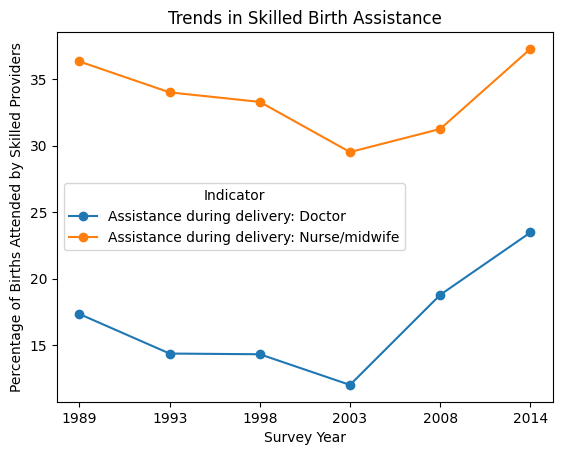

In [51]:
skilled_birth_indicators = [
    'Assistance during delivery: Doctor',
    'Assistance during delivery: Nurse/midwife'
]

df_skilled_birth = df_health[df_health['Indicator'].isin(skilled_birth_indicators)]

pivot_skilled_birth = df_skilled_birth.pivot_table(
    index='SurveyYear', columns='Indicator',  values='Value'
)

# Plot the trends
pivot_skilled_birth.plot(kind='line', marker='o')
plt.title('Trends in Skilled Birth Assistance')
plt.xlabel('Survey Year')
plt.ylabel('Percentage of Births Attended by Skilled Providers')
plt.legend(title='Indicator')
plt.grid(False)
plt.show()

5. C-Section  Rates by Region and Facility type
How do C-section rates vary by region and place of delivery(public  vs. private sector)?